In [1]:
from util_multi import *
%load_ext autoreload

In [16]:
%autoreload

# Gaussian Clusters Example - 3 clusters

Note now we don't calculate the EEM method for choosing queries because we haven't generalized the 0-1 risk calculation of Zhu et al for the multiclass case. So in the multiclass case we are just showing V and $\Sigma$ optimality choices.

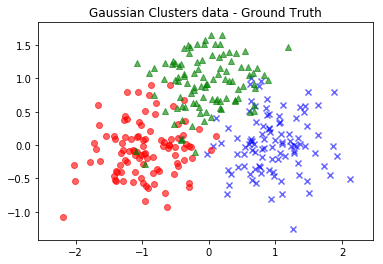

In [2]:
# Problem Setup --- Need to rework this example to be more general. I've made it so that the clusters are 
# in consecutive order for plotting m (0-99, 100-199). For this I had to re write the helper functions when 
# doing the Two moons dataset.

Ns = [100,100,100]
N = sum(Ns)
fs = 5
means = [np.array([1.0,0.]), np.array([-1.0,0.]), np.array([0.,1.0])]
Covs = [0.2*np.eye(2), 0.2*np.eye(2), 0.2*np.eye(2)]

# define fidelity and ground truth 
fid_orig = {}
fid_orig[1] = list(range(fs))
fid_orig[2] = [Ns[0] + i for i in range(fs)]
fid_orig[3] = [Ns[0]+ Ns[1] + i for i in range(fs)]
ground_truth = np.ones(N,dtype='int')
ground_truth[Ns[0]:Ns[0]+Ns[1]] = 2
ground_truth[Ns[0]+Ns[1]:] = 3

# Graph computations
X, W = generate_data_graphs(Ns, means, Covs)
w,v = get_eig_Lnorm(W)

class1_ind = np.where(ground_truth == 1)[0]
class2_ind = np.where(ground_truth == 2)[0]
class3_ind = np.where(ground_truth == 3)[0]

# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[class1_ind,0], X[class1_ind,1], marker='x', c='b', alpha=0.6)
plt.scatter(X[class2_ind,0], X[class2_ind,1], marker='o', c='r',alpha=0.6)
plt.scatter(X[class3_ind,0], X[class3_ind,1], marker='^', c='g',alpha=0.6)
plt.axis('equal')
plt.title('Gaussian Clusters data - Ground Truth')
plt.show()

In [14]:
# Model Setup
tau, alpha, gamma = 0.1, 1.0, 0.001
gamma2 = gamma**2.
tag2 = (tau, alpha, gamma2)
verbose = False     # set to True if want to see visual of which points chosen
num_iters = 20
batch_size = 1



In [4]:
# Active Learning - Sigma optimal multiclass
fid = copy.deepcopy(fid_orig)
method = 'S'
test_opts = (batch_size, num_iters, verbose)
ERRS_S, M_S = run_test_AL_VS_multi(X, v, w, fid, ground_truth, method, tag2, test_opts)

if verbose:
    print(ERRS_S)

In [5]:
# Active Learning - V optimal multiclass
fid = copy.deepcopy(fid_orig)
method = 'V'
test_opts = (batch_size, num_iters, verbose)
ERRS_V, M_V = run_test_AL_VS_multi(X, v, w, fid, ground_truth, method, tag2, test_opts)

if verbose:
    print(ERRS_V)

## Compare to Random Sampling

In [6]:
fid = copy.deepcopy(fid_orig)
tag2 = (tau, alpha, gamma2)
test_opts = (num_iters, False)
show_all_iters = True
ERRS_rand, M_rand = run_test_rand_multi(X, v, w, fid, ground_truth, tag2, 
                                        test_opts,show_all_iters=show_all_iters)

if verbose:
    print(ERRS_rand)

## Convergence Comparison

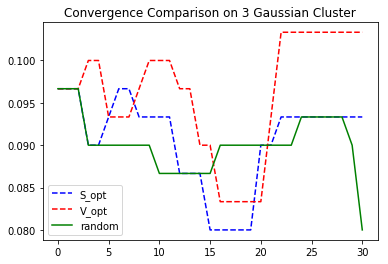

In [7]:
num_batches = int(num_iters/batch_size)
ids_s, errs_s = zip(*ERRS_S)
ids_v, errs_v = zip(*ERRS_V)
ids_rand, errs_rand = zip(*ERRS_rand)
plt.figure()
plt.plot([i*batch_size for i in range(num_batches+1)], errs_s, 'b--', label='S_opt')
plt.plot([i*batch_size for i in range(num_batches+1)], errs_v, 'r--', label='V_opt')
if show_all_iters:
    plt.plot([i for i in range(num_iters+1)], errs_rand, 'g', label='random')
else:
    plt.plot([0,num_iters], errs_rand, 'g', label='random')
plt.title('Convergence Comparison on 3 Gaussian Cluster')
plt.legend()

# 2 Moons Example


We check the compatibility of the binary case (with labels $-1,+1$) with the newly written `*_multi` functions

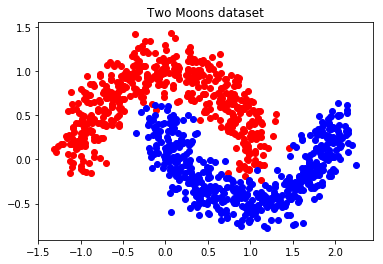

In [18]:
# Setup
N = 1000
data = make_moons(N, noise=0.15)

X, ground_truth = data
X1, X2 = X[ground_truth == 0,:], X[ground_truth == 1,:] 
ground_truth[np.where(ground_truth == 0)] = -1

#plt.rcParams['figure.figsize'] =(6,6)
plt.scatter(X1[:,0], X1[:,1], c='r')
plt.scatter(X2[:,0], X2[:,1], c='b')
plt.title('Two Moons dataset')
plt.show()



# Define the labeled and unlabed indices
sup_percent = 0.05
indices = np.array(list(range(N)))
labeled_orig = set()
fid_orig = {}
gt_flipped = {}
for i in [1,-1]:
    i_mask = indices[ground_truth ==i]
    gt_flipped[i] = i_mask
    np.random.shuffle(i_mask)
    n_i = len(i_mask)
    fid_orig[i] = list(i_mask[:int(sup_percent*n_i)])
    labeled_orig = labeled_orig.union(set(fid_orig[i]))
unlabeled_orig = sorted(list(set(indices) - labeled_orig))
labeled_orig = sorted(list(labeled_orig))


# Graph Generation and Eigen-Calculation
W = make_sim_graph(X)
w,v = get_eig_Lnorm(W)


# Model Setup
tau, alpha, gamma = 0.01, 1.0, 0.001
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 20
batch_size = 1
tag2 = (tau, alpha, gamma2)
test_opts = (batch_size, num_iters, verbose)

calc_orig_multi took 0.099226 seconds
Iter = 0


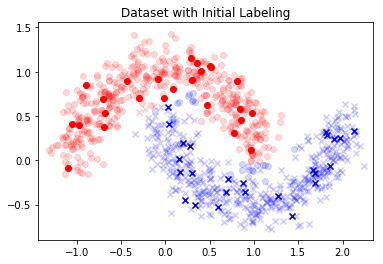

Iter = 1


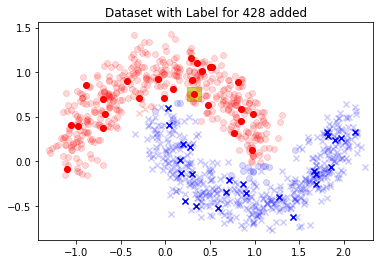

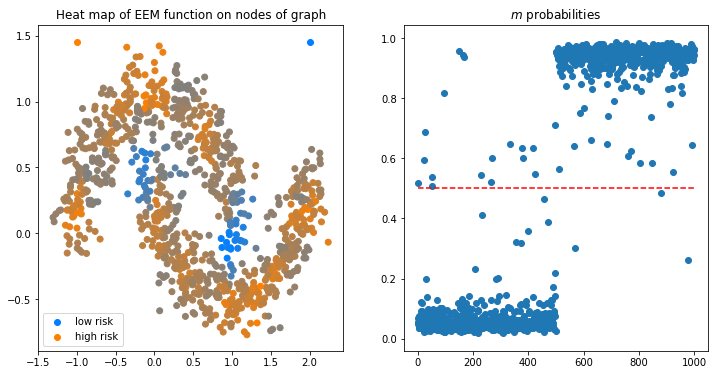

Iter = 2


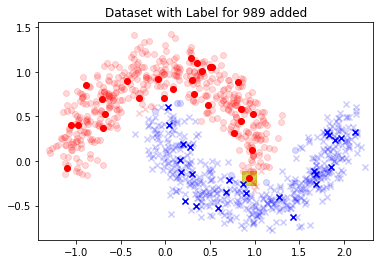

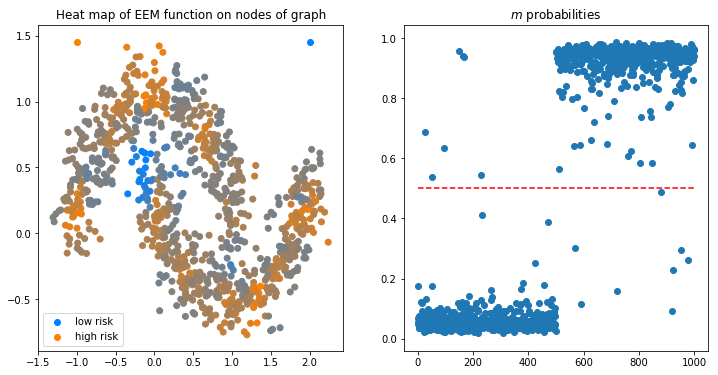

Iter = 3


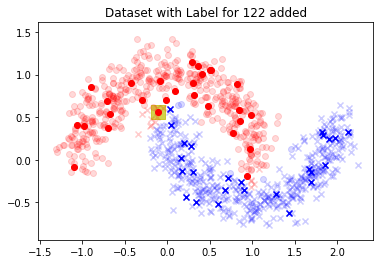

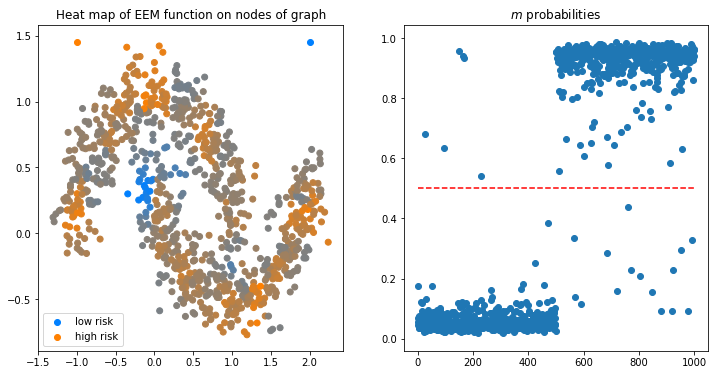

Iter = 4


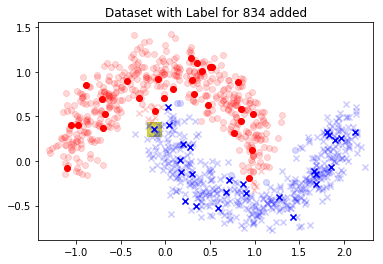

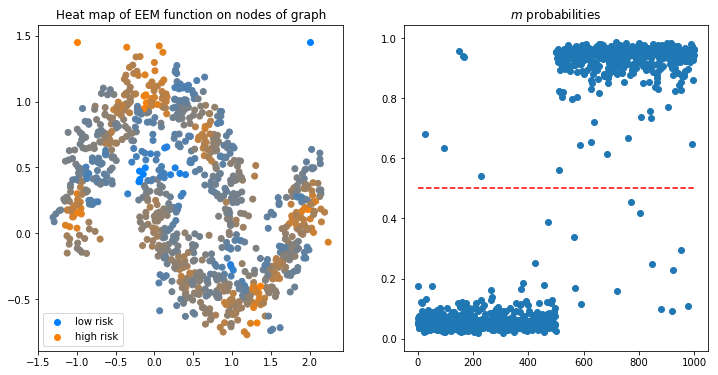

Iter = 5


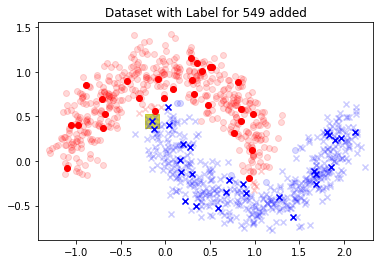

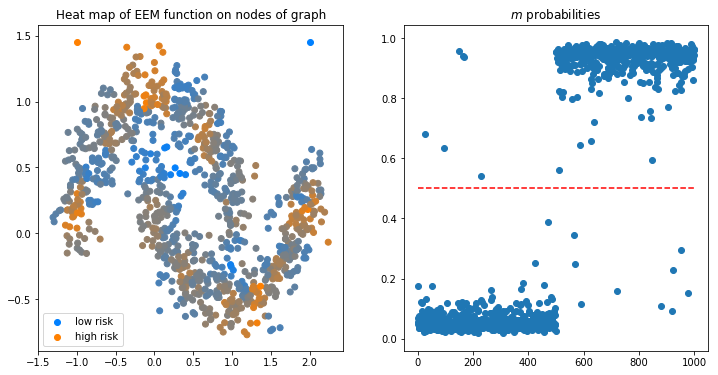

Iter = 6


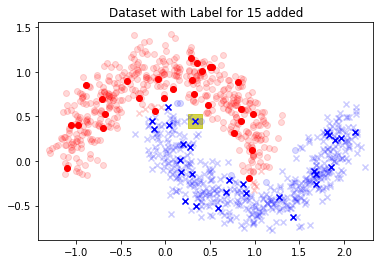

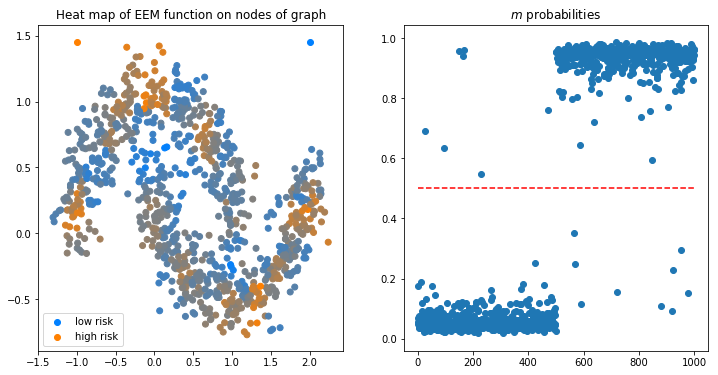

Iter = 7


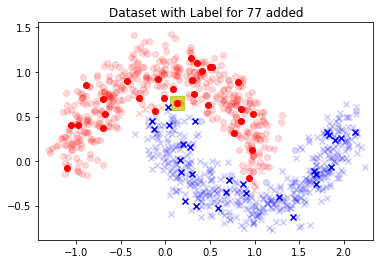

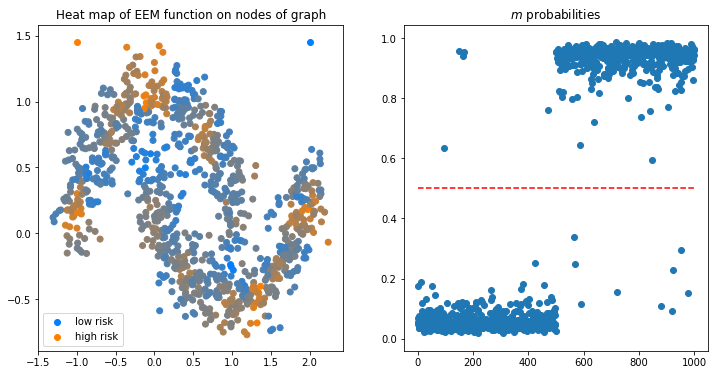

Iter = 8


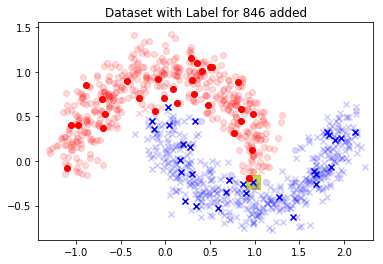

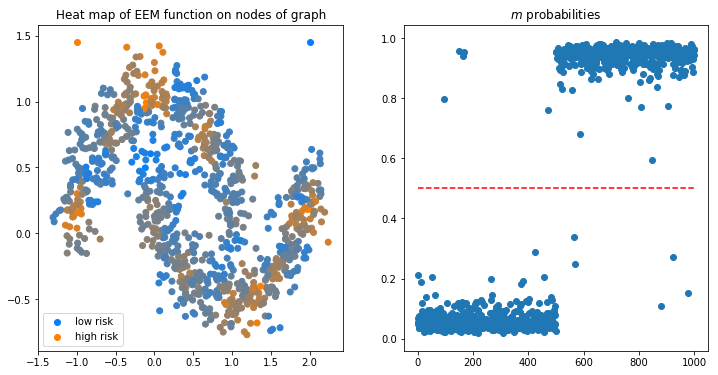

Iter = 9


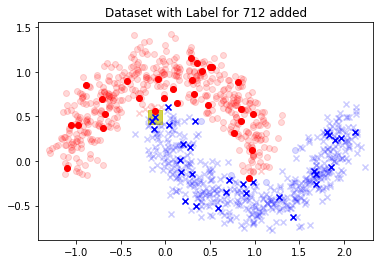

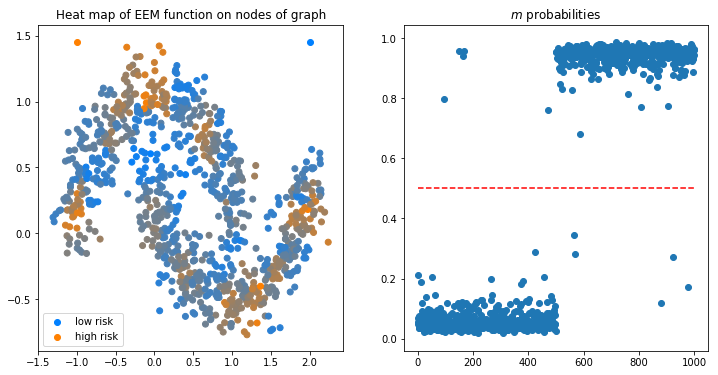

Iter = 10


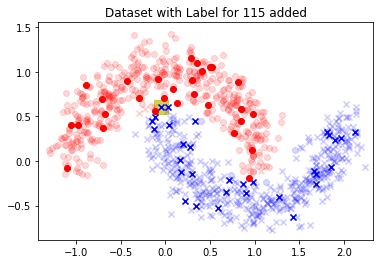

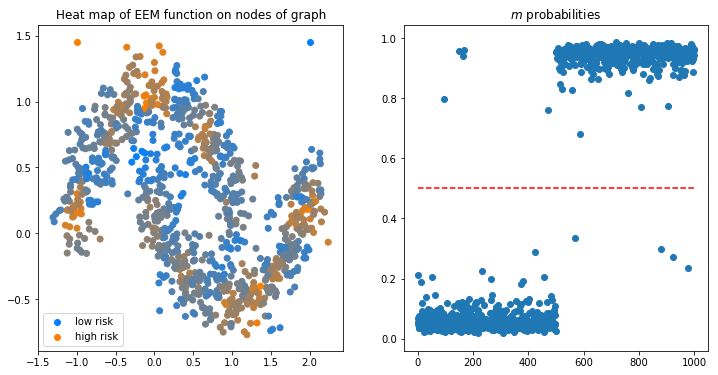

Iter = 11


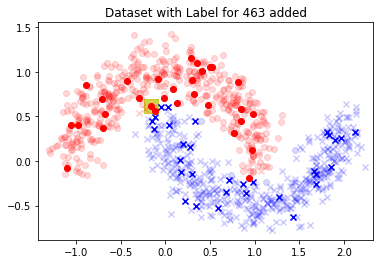

KeyboardInterrupt: 

In [19]:
# Active Learning Choices  -- EEM
fid = copy.deepcopy(fid_orig)
ERRS, M = run_test_AL(X, v, w, fid, ground_truth, 
                               tag2=tag2, test_opts=(num_iters, verbose))

if verbose:
    print(ERRS)

calc_orig_multi took 0.102122 seconds
Iter = 0


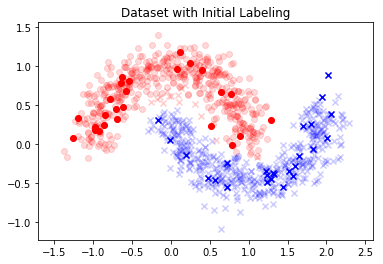

Time for V_opt = 0.003048
Iter = 1


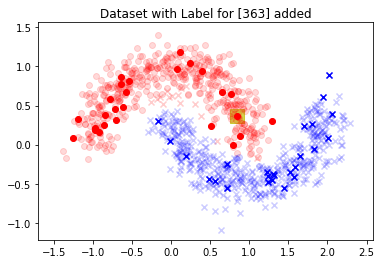

Time for V_opt = 0.003905
Iter = 2


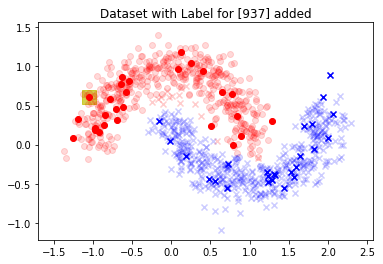

Time for V_opt = 0.004233
Iter = 3


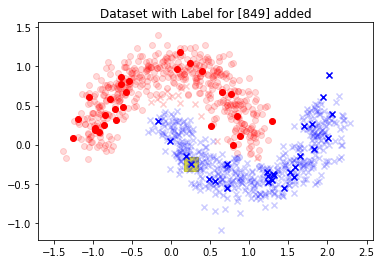

Time for V_opt = 0.002703
Iter = 4


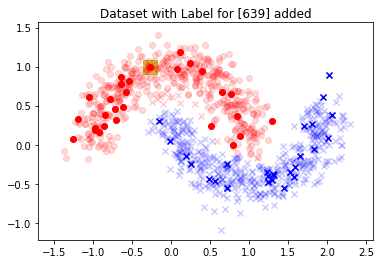

Time for V_opt = 0.003220
Iter = 5


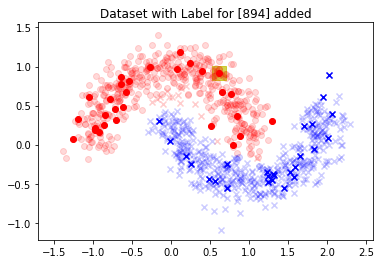

Time for V_opt = 0.004156
Iter = 6


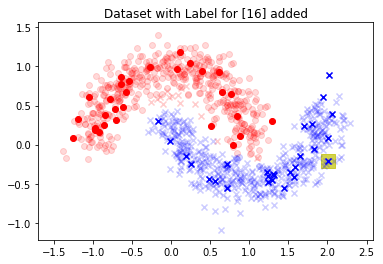

Time for V_opt = 0.003313
Iter = 7


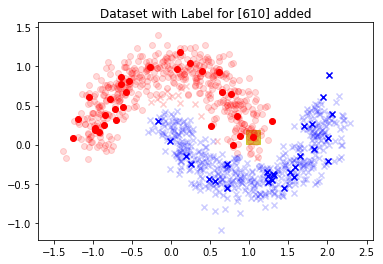

Time for V_opt = 0.004823
Iter = 8


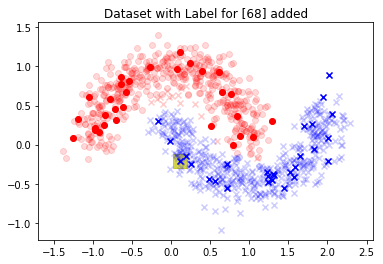

Time for V_opt = 0.003716
Iter = 9


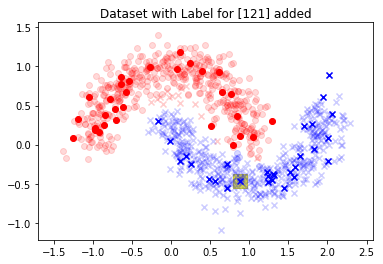

Time for V_opt = 0.003159
Iter = 10


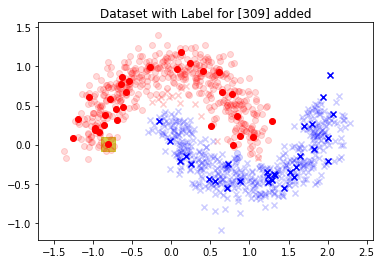

Time for V_opt = 0.004344
Iter = 11


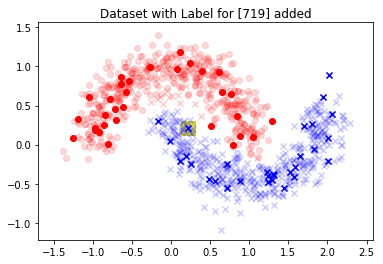

Time for V_opt = 0.004461
Iter = 12


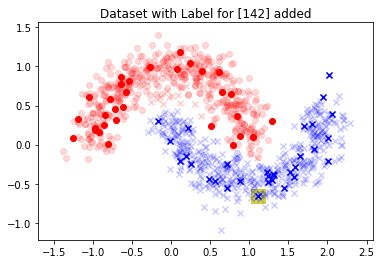

Time for V_opt = 0.003736
Iter = 13


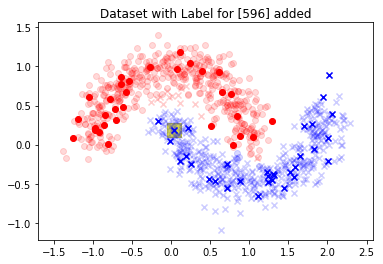

Time for V_opt = 0.004169
Iter = 14


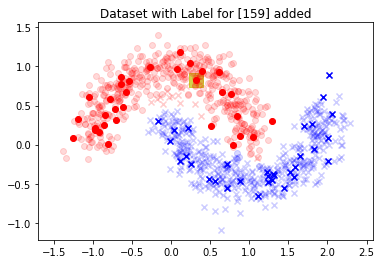

Time for V_opt = 0.002718
Iter = 15


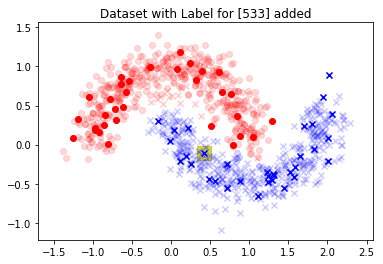

Time for V_opt = 0.004911
Iter = 16


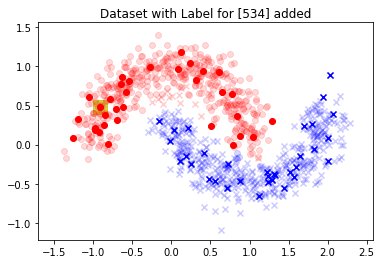

Time for V_opt = 0.004552
Iter = 17


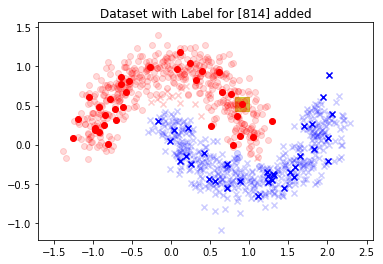

Time for V_opt = 0.005108
Iter = 18


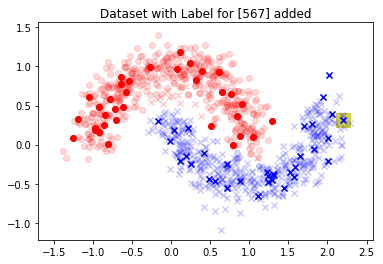

Time for V_opt = 0.002545
Iter = 19


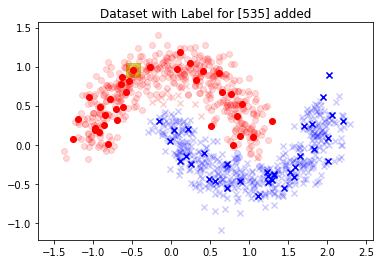

Time for V_opt = 0.003193
Iter = 20


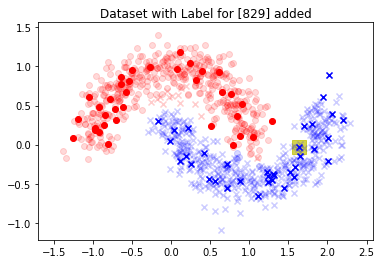

[(-1, 0.02), ([363], 0.02), ([937], 0.02), ([849], 0.02), ([639], 0.02), ([894], 0.02), ([16], 0.02), ([610], 0.02), ([68], 0.02), ([121], 0.021), ([309], 0.021), ([719], 0.02), ([142], 0.02), ([596], 0.02), ([159], 0.02), ([533], 0.02), ([534], 0.02), ([814], 0.02), ([567], 0.02), ([535], 0.02), ([829], 0.02)]


In [16]:
# Active Learning Choices  -- V_Opt
fid = copy.deepcopy(fid_orig)
method = 'V'
ERRS_V, M_V = run_test_AL_VS_multi(X, v, w, fid, ground_truth, method=method, 
                               tag2=tag2, test_opts=test_opts)

if verbose:
    print(ERRS_V)

calc_orig_multi took 0.068136 seconds
Iter = 0


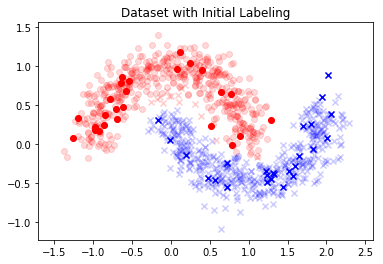

Time for S_opt = 0.003976
Iter = 1


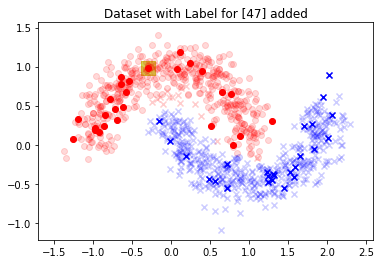

Time for S_opt = 0.001442
Iter = 2


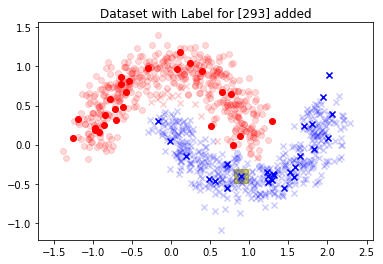

Time for S_opt = 0.001952
Iter = 3


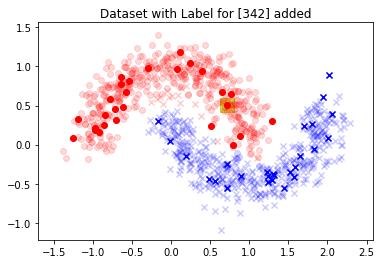

Time for S_opt = 0.006152
Iter = 4


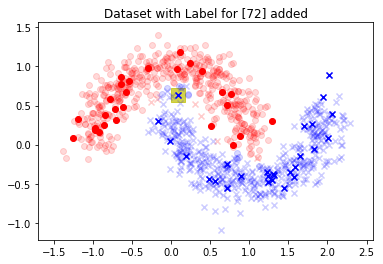

Time for S_opt = 0.002147
Iter = 5


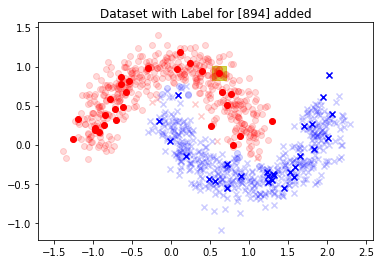

Time for S_opt = 0.002970
Iter = 6


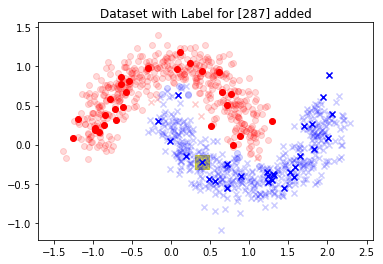

Time for S_opt = 0.002556
Iter = 7


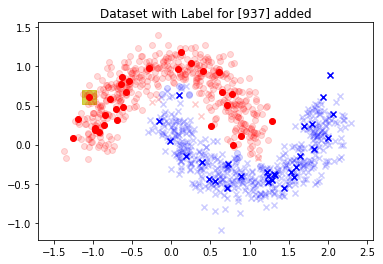

Time for S_opt = 0.002875
Iter = 8


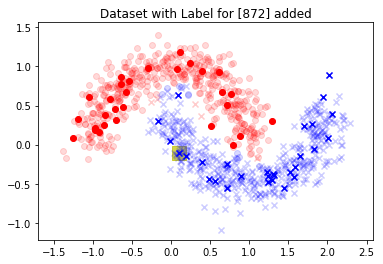

Time for S_opt = 0.002694
Iter = 9


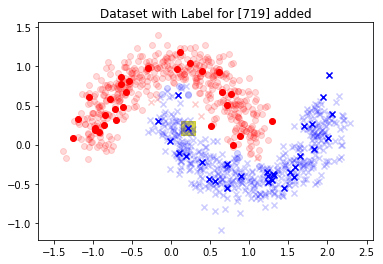

Time for S_opt = 0.002752
Iter = 10


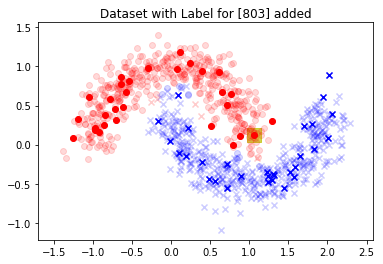

Time for S_opt = 0.002819
Iter = 11


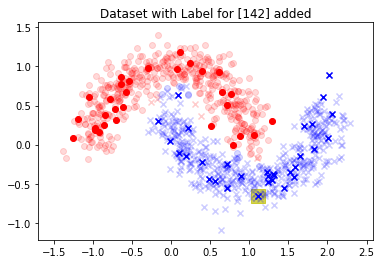

Time for S_opt = 0.002791
Iter = 12


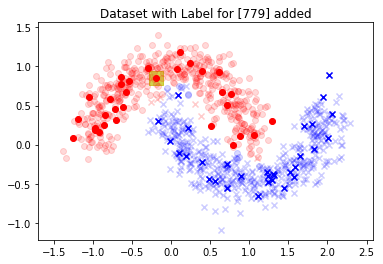

Time for S_opt = 0.001332
Iter = 13


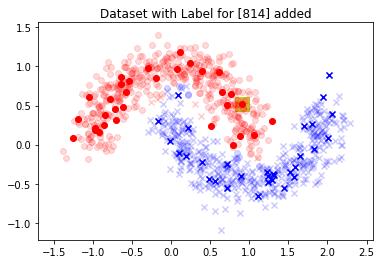

Time for S_opt = 0.001344
Iter = 14


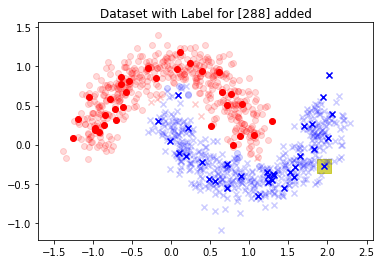

Time for S_opt = 0.005917
Iter = 15


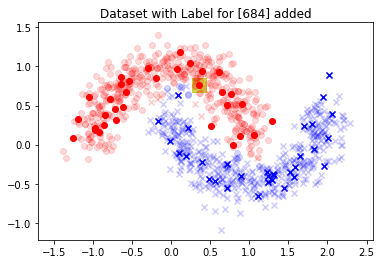

Time for S_opt = 0.002637
Iter = 16


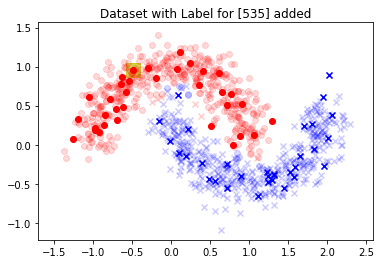

Time for S_opt = 0.003001
Iter = 17


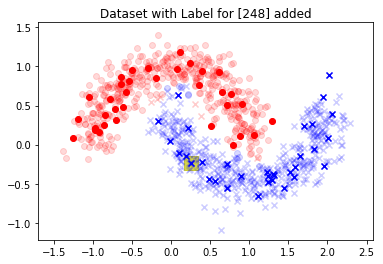

Time for S_opt = 0.002641
Iter = 18


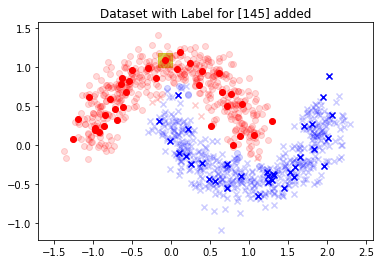

Time for S_opt = 0.001892
Iter = 19


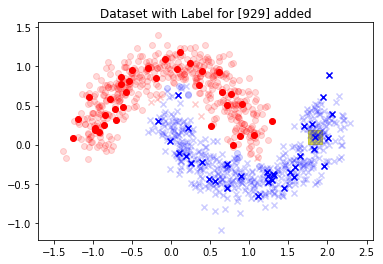

Time for S_opt = 0.002565
Iter = 20


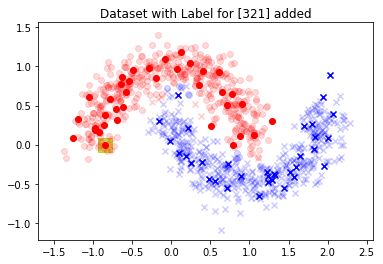

[(-1, 0.02), ([47], 0.02), ([293], 0.021), ([342], 0.021), ([72], 0.018), ([894], 0.018), ([287], 0.017), ([937], 0.017), ([872], 0.017), ([719], 0.017), ([803], 0.017), ([142], 0.017), ([779], 0.017), ([814], 0.017), ([288], 0.017), ([684], 0.017), ([535], 0.017), ([248], 0.017), ([145], 0.017), ([929], 0.017), ([321], 0.017)]


In [17]:
# Active Learning Choices  -- Sigma_Opt
fid = copy.deepcopy(fid_orig)
method = 'S'
ERRS_S, M_S = run_test_AL_VS_multi(X, v, w, fid, ground_truth, method='S', 
                               tag2=tag2, test_opts=test_opts)

if verbose:
    print(ERRS_S)

In [20]:
# Random choices
fid = copy.deepcopy(fid_orig)
show_all_iters = True
ERRS_rand, M_rand = run_test_rand_multi(X, v, w, fid, ground_truth,tag2=tag2, 
                                        test_opts=(num_iters, False), show_all_iters=show_all_iters)
if verbose:
    print(ERRS_rand)

[(-1, 0.02), (894, 0.02), (727, 0.02), (468, 0.02), (870, 0.02), (339, 0.02), (426, 0.02), (263, 0.02), (828, 0.02), (746, 0.02), (211, 0.02), (956, 0.02), (889, 0.02), (375, 0.02), (798, 0.021), (138, 0.015), (699, 0.015), (451, 0.015), (241, 0.015), (150, 0.015), (92, 0.015)]


## Error Plotting - 2 Moons 

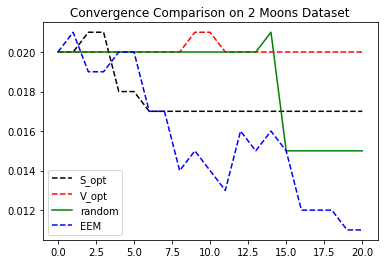

In [21]:
colors = ['y', 'r', 'k', 'g']
ids, errs =zip(*ERRS)
ids_s, errs_s = zip(*ERRS_S)
ids_v, errs_v = zip(*ERRS_V)
ids_rand, errs_rand = zip(*ERRS_rand)
num_batches = int(num_iters / batch_size)
plt.figure()
plt.plot([i*batch_size for i in range(num_batches+1)], errs_s, 'k--', label='S_opt')
plt.plot([i*batch_size for i in range(num_batches+1)], errs_v, 'r--', label='V_opt')
if show_all_iters:
    plt.plot([i for i in range(num_iters+1)], errs_rand, 'g', label='random')
else:
    plt.plot([0,num_iters], errs_rand, 'g', label='random')
plt.plot([i for i in range(num_iters+1)], errs, 'b--', label='EEM')
plt.legend()
plt.title('Convergence Comparison on 2 Moons Dataset')
plt.show()

# 2 Gaussian Clusters - Check for Compatibility

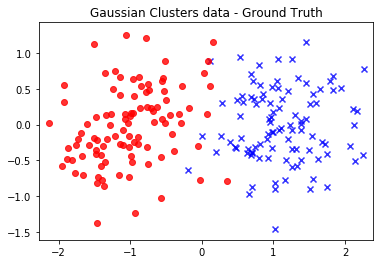

In [23]:
# Problem Setup --- Need to rework this example to be more general. I've made it so that the clusters are 
# in consecutive order for plotting m (0-99, 100-199). For this I had to re write the helper functions when 
# doing the Two moons dataset.

Ns = [100,100]
N = sum(Ns)
fs = 5
means = [np.array([1.0,0.]), np.array([-1.0,0.])]
Covs = [0.3*np.eye(2), 0.3*np.eye(2)]

# define fidelity and ground truth 
fid_orig = {}
fid_orig[1] = list(range(fs))
fid_orig[-1] = [Ns[0] + i for i in range(fs)]
ground_truth = np.array([1. if i<Ns[0] else -1. for i in range(N)])


# Graph computations
X, W = generate_data_graphs(Ns, means, Covs)
w,v = get_eig_Lnorm(W, normed_=True)

# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[:Ns[0],0], X[:Ns[0],1], marker='x', c='b', alpha=0.8)
plt.scatter(X[Ns[0]:,0], X[Ns[0]:,1], marker='o', c='r',alpha=0.8)
plt.axis('equal')
plt.title('Gaussian Clusters data - Ground Truth')
plt.show()



# Model Setup
tau, alpha, gamma = 0.01, 1.0, 0.001
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 10
batch_size = 5
tag2 = (tau, alpha, gamma2)

calc_orig_multi took 0.002863 seconds
Iter = 0


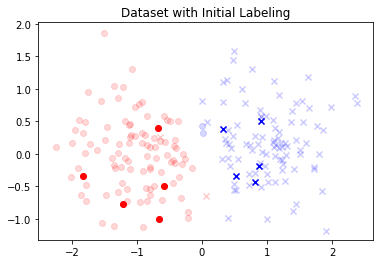

Time for S_opt = 0.000794
Time for S_opt = 0.000389
Time for S_opt = 0.000380
Time for S_opt = 0.000431
Time for S_opt = 0.000384
Iter = 1


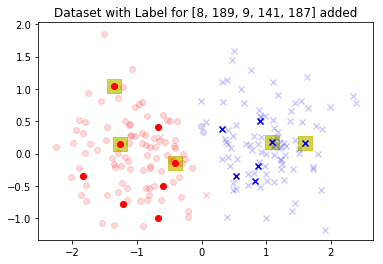

Time for S_opt = 0.000388
Time for S_opt = 0.000240
Time for S_opt = 0.000220
Time for S_opt = 0.000275
Time for S_opt = 0.000374
Iter = 2


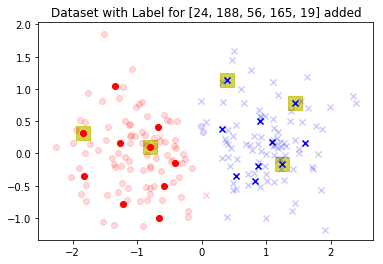

Time for S_opt = 0.000435
Time for S_opt = 0.000235
Time for S_opt = 0.000215
Time for S_opt = 0.000248
Time for S_opt = 0.000392
Iter = 3


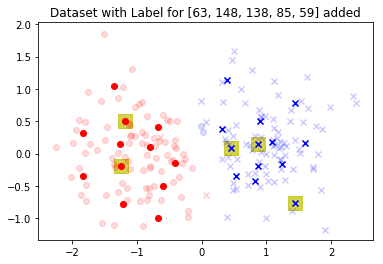

Time for S_opt = 0.000907
Time for S_opt = 0.000228
Time for S_opt = 0.000233
Time for S_opt = 0.000241
Time for S_opt = 0.000390
Iter = 4


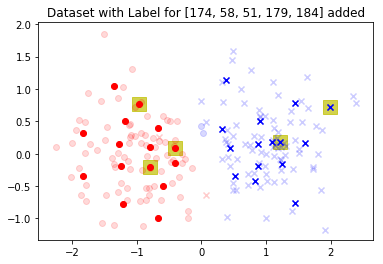

Time for S_opt = 0.000599
Time for S_opt = 0.000213
Time for S_opt = 0.000199
Time for S_opt = 0.000258
Time for S_opt = 0.000216
Iter = 5


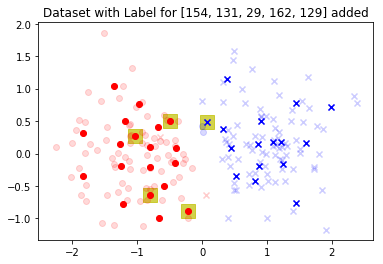

Time for S_opt = 0.000431
Time for S_opt = 0.000205
Time for S_opt = 0.000197
Time for S_opt = 0.000246
Time for S_opt = 0.000212
Iter = 6


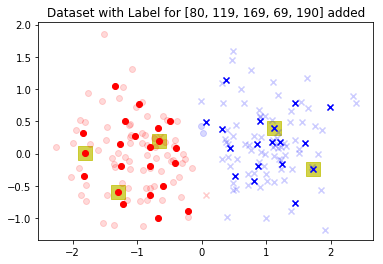

Time for S_opt = 0.000491
Time for S_opt = 0.000197
Time for S_opt = 0.000292
Time for S_opt = 0.000208
Time for S_opt = 0.000238
Iter = 7


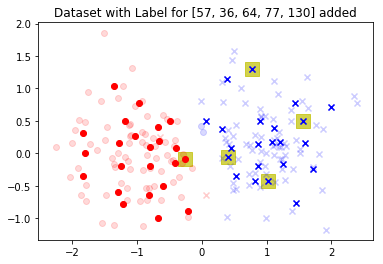

Time for S_opt = 0.000476
Time for S_opt = 0.000191
Time for S_opt = 0.000180
Time for S_opt = 0.000228
Time for S_opt = 0.000195
Iter = 8


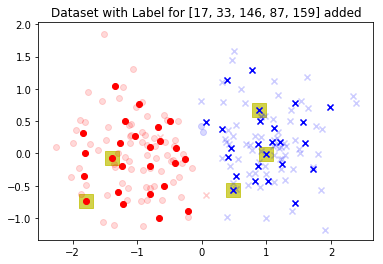

[(-1, 0.02), ([8, 189, 9, 141, 187], 0.02), ([24, 188, 56, 165, 19], 0.02), ([63, 148, 138, 85, 59], 0.02), ([174, 58, 51, 179, 184], 0.02), ([154, 131, 29, 162, 129], 0.02), ([80, 119, 169, 69, 190], 0.02), ([57, 36, 64, 77, 130], 0.02), ([17, 33, 146, 87, 159], 0.02)]


In [21]:
# Active Learning - Sigma optimal multiclass
fid = copy.deepcopy(fid_orig)
method = 'S'
test_opts = (batch_size, num_iters, verbose)
ERRS_S, M_S = run_test_AL_VS_multi(X, v, w, fid, ground_truth, method, tag2, test_opts)

if verbose:
    print(ERRS_S)

calc_orig_multi took 0.002337 seconds
Iter = 0


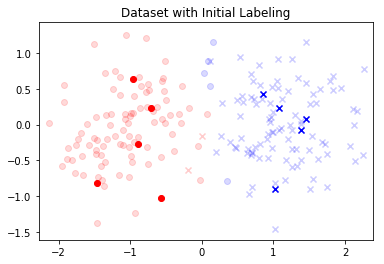

Iter = 1


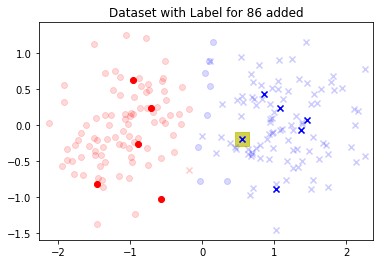

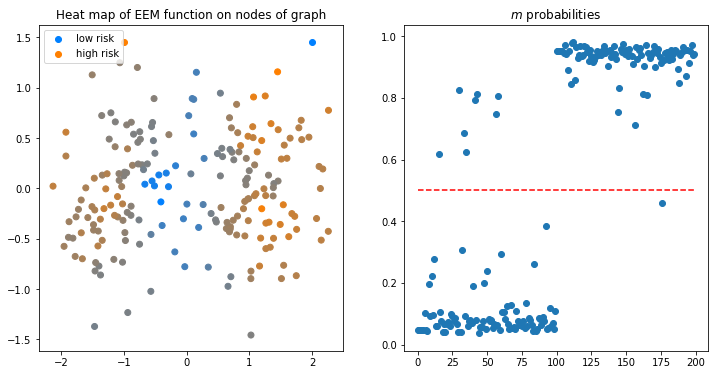

Iter = 2


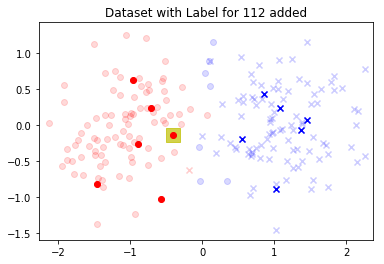

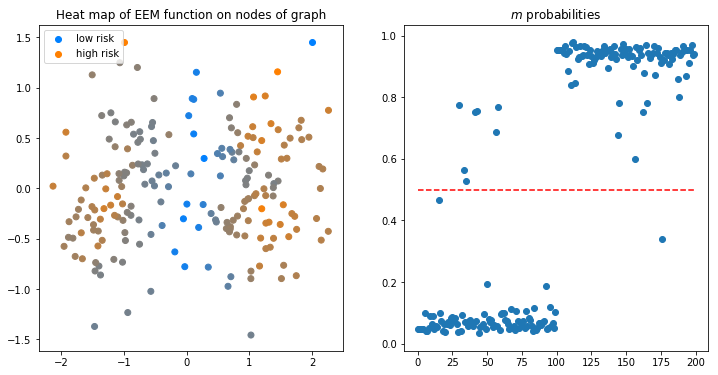

Iter = 3


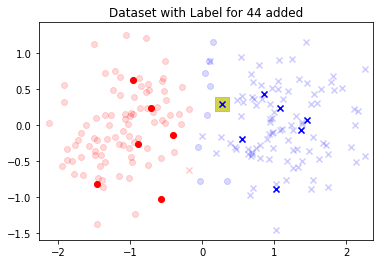

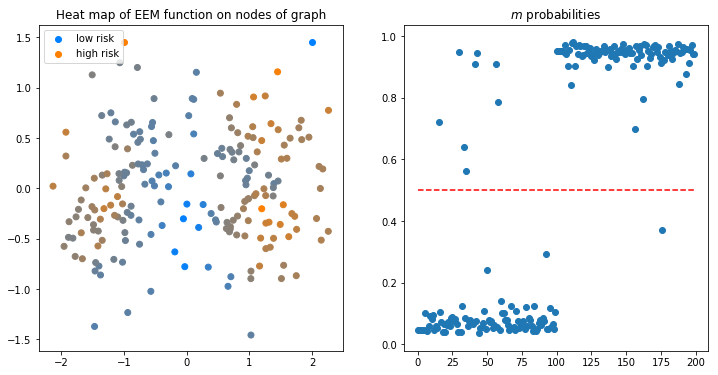

Iter = 4


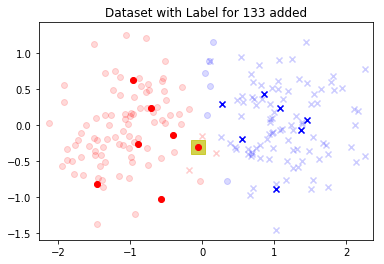

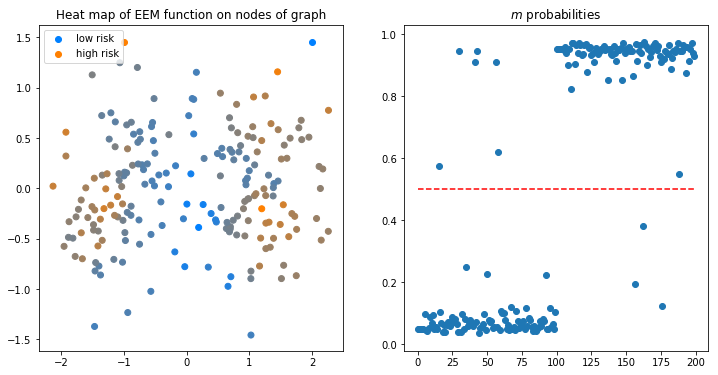

Iter = 5


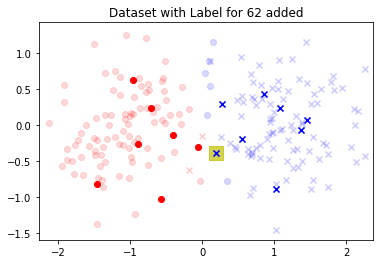

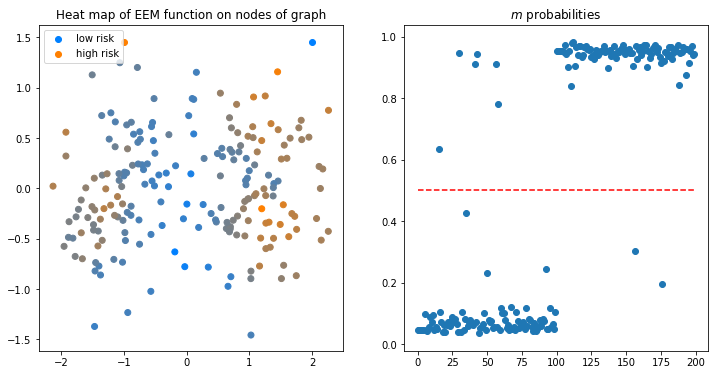

Iter = 6


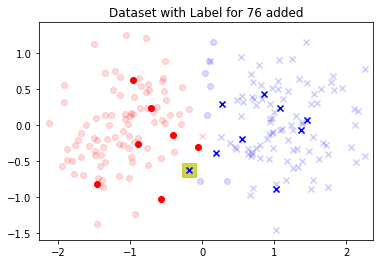

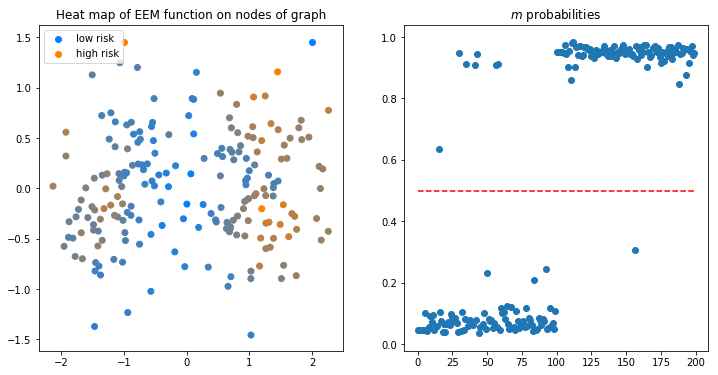

Iter = 7


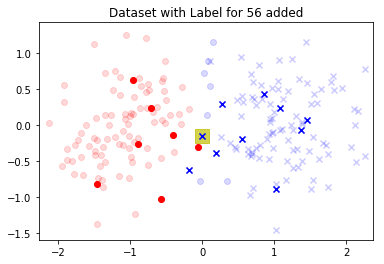

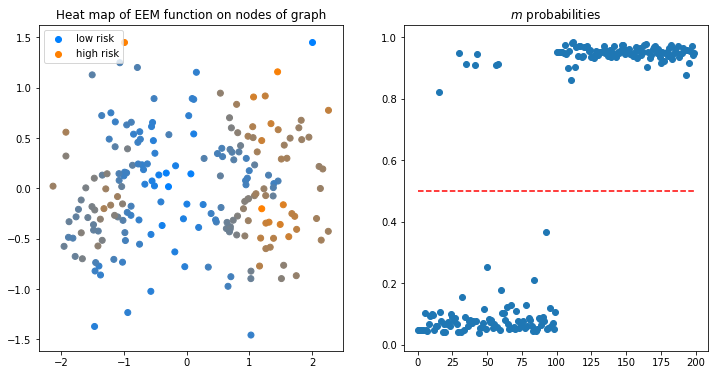

Iter = 8


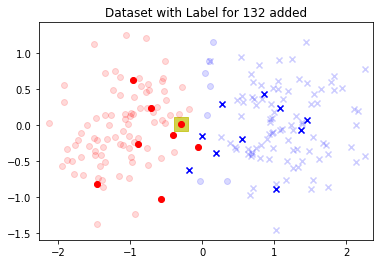

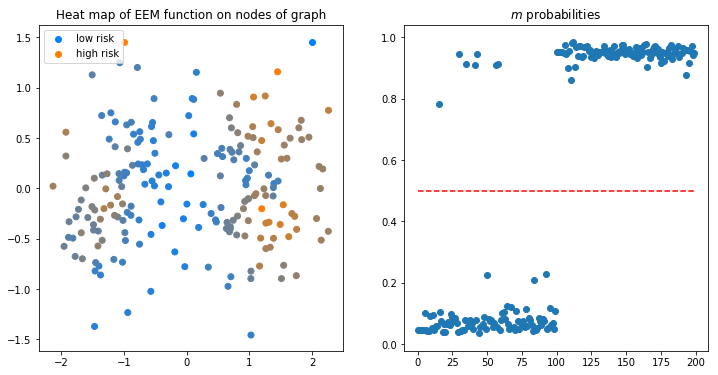

Iter = 9


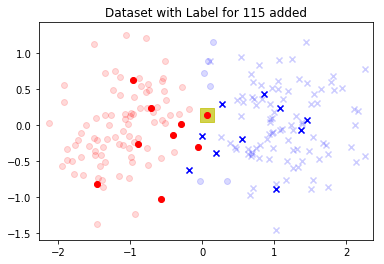

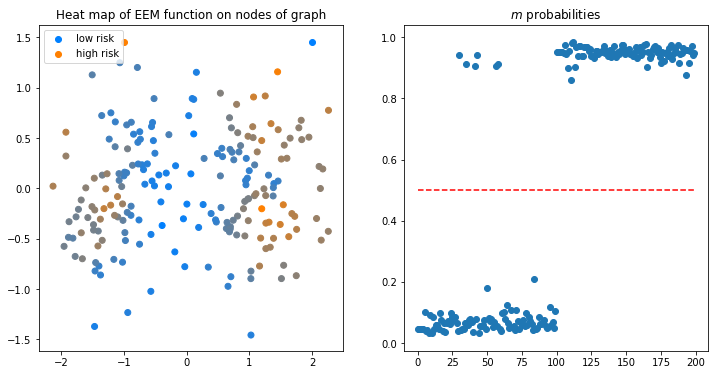

Iter = 10


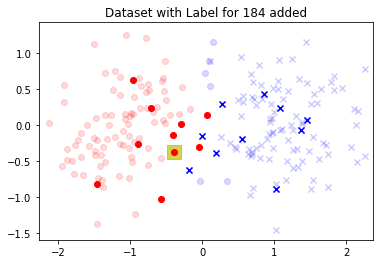

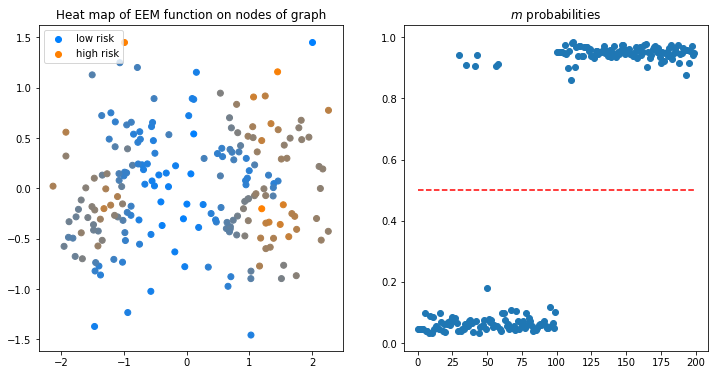

[(-1, 0.035), (86, 0.045), (112, 0.04), (44, 0.045), (133, 0.045), (62, 0.04), (76, 0.04), (56, 0.035), (132, 0.035), (115, 0.03), (184, 0.03)]


In [25]:
# Active Learning - EEM binary class
fid = copy.deepcopy(fid_orig)
test_opts = (num_iters, verbose)
ERRS, M = run_test_AL(X, v, w, fid, ground_truth, tag2, test_opts)

if verbose:
    print(ERRS)

## Observations

Making $\gamma$ smaller correlates to choosing better decision boundary nodes. Higher confidence in the labelings we've seen, a compared to the value of $\tau$. Something about the ratio of $\tau$ and $\gamma$....

Maybe we could toggle the value of $\gamma$ to obtain samples that are closer (or further) from the boundary, depending on whether or not we want to preserve diversity?